In [9]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [10]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [11]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

In [12]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

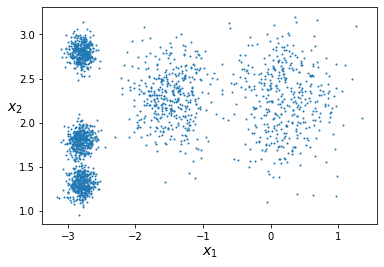

In [13]:
plot_clusters(X)

In [14]:
k = 5
kmeans  = KMeans(n_clusters = k, n_init = 10)
y_pred = kmeans.fit_predict(X)

In [15]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

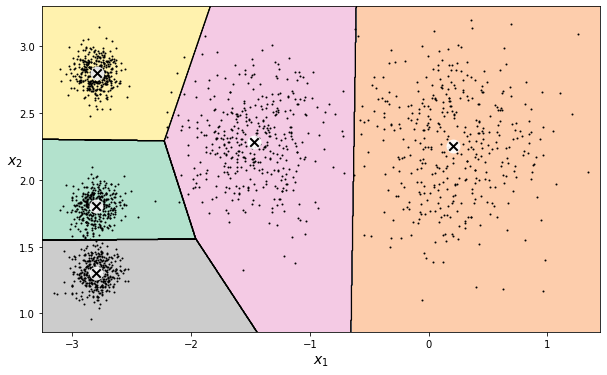

In [16]:
plt.figure(figsize = (10,6))
plot_decision_boundaries(kmeans, X)

In [17]:
from sklearn.metrics import silhouette_score

In [18]:
silhouette_score(X, kmeans.labels_)

0.655517642572828

In [19]:
n = range(2,9)
score = []
for i in n:
    kmeans = KMeans(n_clusters = i, n_init = 10)
    y_pred = kmeans.fit_predict(X)
    score.append(silhouette_score(X, kmeans.labels_))

Text(0.5, 0, 'k')

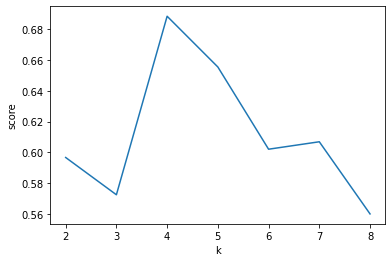

In [20]:
plt.plot(range(2,9), score)
plt.ylabel("score")
plt.xlabel("k")

In [34]:
from matplotlib.image import imread

In [35]:
import os
import urllib
PROJECT_ROOT_DIR = r"/Users/James/Documents/Python/Hands_on_scikit_learn/chapter_9"
# Download the ladybug image
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "unsupervised_learning")
os.makedirs(images_path, exist_ok=True)
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
filename = "ladybug.png"
print("Downloading", filename)
url = DOWNLOAD_ROOT + "images/unsupervised_learning/" + filename
urllib.request.urlretrieve(url, os.path.join(images_path, filename))

('/Users/James/Documents/Python/Hands_on_scikit_learn/chapter_9/images/unsupervised_learning/ladybug.png',
 <http.client.HTTPMessage at 0x1284f3eb0>)

In [36]:
image = imread(os.path.join("images", "unsupervised_learning", "ladybug.png"))

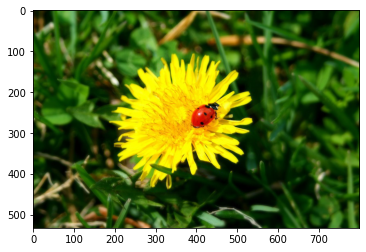

In [37]:
plt.imshow(image)

In [38]:
image.shape

(533, 800, 3)

In [41]:
X = image.reshape(-1,3)
kmeans = KMeans(n_clusters = 4).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

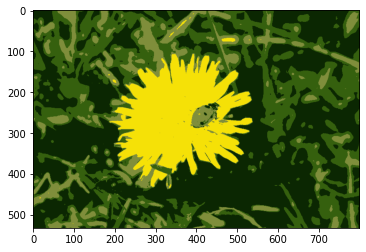

In [42]:
plt.imshow(segmented_img)

In [47]:
from sklearn.datasets import load_digits
X_digits, y_digits = load_digits(return_X_y = True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)


0.96

In [48]:
from sklearn.pipeline import Pipeline

In [51]:
pipeline = Pipeline([
    ("kmeans", KMeans(n_clusters = 50)), 
    ("log_reg", LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42))
])
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9733333333333334

Semi Supervised Learning

In [101]:
n_labeled = 50
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", random_state=42, max_iter = 5000)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])
log_reg.score(X_test, y_test)

0.8311111111111111

In [104]:
k = 50
kmeans = KMeans(n_clusters=k, random_state=42)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

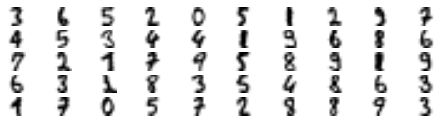

In [105]:
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

In [107]:
y_train[representative_digit_idx]

array([3, 6, 5, 2, 0, 5, 1, 2, 9, 7, 4, 5, 3, 4, 4, 1, 9, 6, 8, 6, 7, 2,
       1, 7, 9, 5, 8, 9, 1, 9, 6, 3, 1, 8, 3, 5, 4, 8, 6, 3, 1, 7, 0, 5,
       7, 2, 8, 8, 9, 3])

In [110]:
y_representative_digits = y_train[representative_digit_idx]

In [111]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9

DBSCAN

In [112]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

In [126]:
X,y = make_moons(n_samples = 1000, noise = 0.05)
dbscan = DBSCAN(eps = 0.2, min_samples = 5)
dbscan.fit(X)

DBSCAN(eps=0.2)

In [127]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

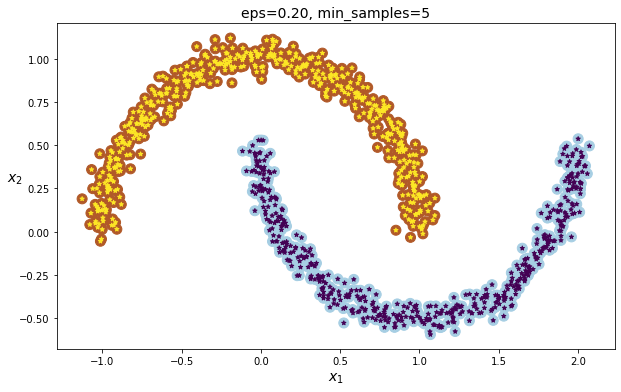

In [128]:
plt.figure(figsize = (10,6))
plot_dbscan(dbscan, X, size = 100)

In [129]:
from sklearn.mixture import GaussianMixture

In [135]:
gm = GaussianMixture(n_components = 3, n_init = 10)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10)

In [136]:
gm.weights_

array([0.61190385, 0.18741392, 0.20068223])

In [137]:
gm.covariances_

array([[[ 0.1888688 , -0.11893994],
        [-0.11893994,  0.2982529 ]],

       [[ 0.03520284,  0.04910765],
        [ 0.04910765,  0.07943828]],

       [[ 0.05096605,  0.06089091],
        [ 0.06089091,  0.08644569]]])

In [138]:
gm.converged_

True

In [139]:
gm.n_iter_

21

In [142]:
gm.predict(X);
gm.predict_proba(X)

array([[1.00000000e+000, 1.10973376e-093, 2.79471122e-061],
       [3.57275624e-002, 0.00000000e+000, 9.64272438e-001],
       [1.00000000e+000, 2.99279221e-094, 6.86695796e-055],
       ...,
       [1.01861984e-003, 0.00000000e+000, 9.98981380e-001],
       [1.46350956e-002, 9.85364904e-001, 2.92386407e-239],
       [1.00000000e+000, 9.27185674e-103, 7.99610406e-056]])

In [143]:
X_new,y_new = gm.sample(6)

In [147]:
X_new

array([[ 0.96026497,  0.41365574],
       [ 0.51684176,  0.98245459],
       [ 1.8132094 , -0.00673052],
       [ 1.79833397, -0.09293623],
       [-0.77472737,  0.36363547],
       [-0.7611066 ,  0.62290682]])

In [149]:
gm.score_samples(X);

In [152]:
from matplotlib.colors import LogNorm
def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

<ipython-input-152-9bb5dd3a8256>:10: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, Z,
<ipython-input-152-9bb5dd3a8256>:13: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(xx, yy, Z,


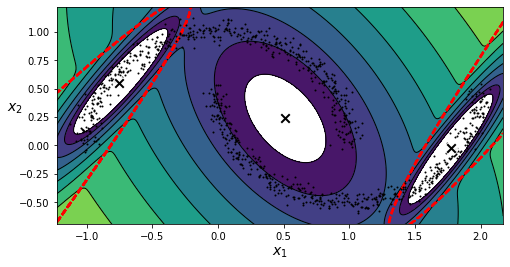

In [153]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)


In [154]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

<ipython-input-152-9bb5dd3a8256>:10: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contourf(xx, yy, Z,
<ipython-input-152-9bb5dd3a8256>:13: UserWarning: Log scale: values of z <= 0 have been masked
  plt.contour(xx, yy, Z,


(-0.6946198812129286, 1.1)

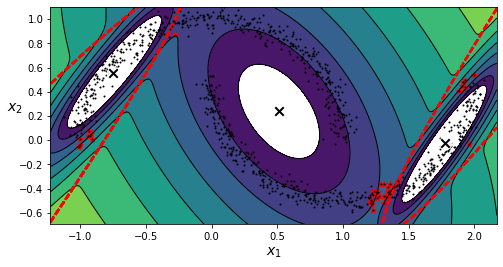

In [157]:
plt.figure(figsize = (8,4))
plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=1.1)
